In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
df_train = pd.read_csv('../Data/csv_result-Descriptors_Training.csv', index_col='id')

In [4]:
df_train.shape

(19988, 29)

#### *Our data has 19988 rows and 28 predictor variables plus 1 target variable or label*

In [5]:
df_train.head()

,IP_ES_25_N1,Z3_IB_4_N1,Z1_IB_10_N1,Z1_IB_5_N1,Z3_IB_8_N1,ECI_IB_4_N1,ECI_IB_5_N1,Gs(U)_IB_12_N1,Gs(U)_IB_68_N1,Gs(U)_IB_58_N1,Gs(U)_IB_60_N1,Z1_NO_sideL35_M,HP_NO_sideL35_CV,Z1_NO_sideR35_CV,Pb_NO_sideR35_S,IP_NO_sideL35_SI71,Z1_NO_PRT_CV,Z2_NO_AHR_CV,Gs(U)_NO_ALR_SI71,Z3_NO_UCR_S,Z3_NO_UCR_N1,ECI_NO_UCR_CV,Pa_NO_BSR_SI71,ISA_NO_NPR_S,Z3_NO_NPR_V,IP_NO_PLR_S,Pb_NO_PCR_V,ECI_NO_PCR_CV,class
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5.59,14.91,13.69,6.45,12.11,28.79,32.40,0.06,0.09,0.04,0.04,0.69,-8.34,6.06,0.94,0.63,10.30,-10.42,0.51,0.69,23.12,0.64,0.76,-0.79,0.68,0.54,0.02,0.59,P
2,4.81,16.87,6.58,11.59,17.25,40.40,56.59,0.04,0.06,0.05,0.05,8.66,-4.56,6.69,0.80,0.62,9.22,2.26,0.55,1.32,2.34,0.52,0.49,-1.27,1.39,-0.11,0.02,0.62,P
3,5.36,13.81,8.25,8.77,14.82,32.42,61.74,0.03,0.06,0.07,0.05,1.07,-5.22,3.33,0.67,0.52,4.69,12.99,0.54,-0.69,-2.24,0.37,0.47,-0.74,2.03,0.58,0.01,0.56,P
4,6.10,73.66,6.41,11.14,37.36,38.26,55.93,0.04,0.19,0.06,0.04,2.39,-29.62,8.46,0.78,0.57,40.87,57.04,0.45,1.50,2.44,0.40,0.44,-0.28,0.43,0.77,0.02,0.65,P
5,-2.00,16.41,8.51,7.07,30.95,50.22,39.52,0.05,0.05,0.04,0.03,2.00,5.82,5.04,1.13,0.54,69.20,57.43,0.53,1.88,7.72,0.42,0.50,-1.12,0.91,0.71,0.01,0.65,P


#### Check for data types

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19988 entries, 1 to 19988
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   IP_ES_25_N1         19988 non-null  float64
 1   Z3_IB_4_N1          19988 non-null  float64
 2   Z1_IB_10_N1         19988 non-null  float64
 3   Z1_IB_5_N1          19988 non-null  float64
 4   Z3_IB_8_N1          19988 non-null  float64
 5   ECI_IB_4_N1         19988 non-null  float64
 6   ECI_IB_5_N1         19988 non-null  float64
 7   Gs(U)_IB_12_N1      19988 non-null  float64
 8   Gs(U)_IB_68_N1      19988 non-null  float64
 9   Gs(U)_IB_58_N1      19988 non-null  float64
 10  Gs(U)_IB_60_N1      19988 non-null  float64
 11  Z1_NO_sideL35_M     19988 non-null  float64
 12  HP_NO_sideL35_CV    19988 non-null  float64
 13  Z1_NO_sideR35_CV    19988 non-null  float64
 14  Pb_NO_sideR35_S     19988 non-null  float64
 15  IP_NO_sideL35_SI71  19988 non-null  float64
 16  Z1_N

#### Summary of the data

In [7]:
df_train.describe()

,IP_ES_25_N1,Z3_IB_4_N1,Z1_IB_10_N1,Z1_IB_5_N1,Z3_IB_8_N1,ECI_IB_4_N1,ECI_IB_5_N1,Gs(U)_IB_12_N1,Gs(U)_IB_68_N1,Gs(U)_IB_58_N1,Gs(U)_IB_60_N1,Z1_NO_sideL35_M,HP_NO_sideL35_CV,Z1_NO_sideR35_CV,Pb_NO_sideR35_S,IP_NO_sideL35_SI71,Z1_NO_PRT_CV,Z2_NO_AHR_CV,Gs(U)_NO_ALR_SI71,Z3_NO_UCR_S,Z3_NO_UCR_N1,ECI_NO_UCR_CV,Pa_NO_BSR_SI71,ISA_NO_NPR_S,Z3_NO_NPR_V,IP_NO_PLR_S,Pb_NO_PCR_V,ECI_NO_PCR_CV
count,19988.000000,19988.000000,19988.000000,19988.000000,19988.000000,19988.000000,19988.000000,19988.000000,19988.000000,19988.000000,19988.000000,19988.000000,1.998800e+04,1.998800e+04,19988.000000,19988.000000,1.998800e+04,1.998800e+04,19988.000000,19988.000000,19988.000000,19988.000000,19988.000000,19988.000000,19988.000000,19988.000000,19988.000000,19988.000000
mean,6.055328,31.696432,18.017728,19.644948,30.470672,83.473169,82.937464,0.061981,0.062465,0.062494,0.061713,2.085148,-1.544989e+12,-1.371076e+13,0.824004,0.545821,-8.920562e+11,4.661674e+12,0.498070,-7.524780,4.841972,-0.556722,-9.971730,-0.656133,1.101837,0.539963,-14.491575,-13.954915
std,3.960338,45.636393,49.571615,54.361490,42.118190,114.766245,114.867519,0.038040,0.037925,0.038326,0.036699,48.063750,4.100786e+15,2.247300e+15,0.557340,0.074375,8.982570e+13,1.792798e+14,0.070604,282.809331,71.169109,100.021984,323.956995,0.567432,0.444763,0.288142,380.598578,380.619060
min,-4.490000,6.540000,5.130000,5.030000,6.420000,14.040000,14.520000,0.020000,0.020000,0.020000,0.020000,-2351.960000,-1.839491e+17,-2.720613e+17,-5.830000,0.040000,-9.992756e+15,-4.115580e+03,0.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-4.360000,0.000000,-2.360000,-9999.000000,-9999.000000
25%,4.770000,14.810000,7.850000,7.860000,14.570000,31.467500,31.290000,0.040000,0.040000,0.040000,0.040000,0.660000,-7.400000e+00,-2.070000e+00,0.590000,0.520000,-2.462500e+00,-6.170000e+00,0.470000,-0.730000,0.537500,0.390000,0.480000,-0.980000,0.780000,0.370000,0.010000,0.540000
50%,5.670000,20.250000,9.230000,9.290000,19.865000,45.050000,44.520000,0.050000,0.050000,0.050000,0.050000,1.010000,-3.650000e+00,3.740000e+00,0.810000,0.550000,4.350000e+00,-2.190000e+00,0.510000,1.070000,4.330000,0.430000,0.530000,-0.710000,1.090000,0.550000,0.020000,0.600000
75%,6.470000,29.340000,11.450000,11.470000,28.850000,78.270000,77.560000,0.070000,0.070000,0.070000,0.070000,1.740000,-1.540000e+00,8.052500e+00,1.040000,0.590000,9.570000e+00,5.080000e+00,0.540000,1.410000,8.760000,0.490000,0.580000,-0.420000,1.400000,0.720000,0.020000,0.630000
max,18.690000,1275.300000,333.330000,333.330000,340.080000,2333.330000,2333.330000,0.840000,0.840000,0.840000,0.840000,4607.050000,2.802253e+17,1.211994e+17,5.360000,0.700000,2.180115e+04,9.202279e+15,0.870000,4.140000,58.390000,1.060000,1.000000,5.450000,3.100000,2.670000,0.050000,0.740000


After analyzing above table, we can see few variables may have outliers <br>
 *for example* **column 'Z3_IB_4_N1' - mean = 18.0177 & median = 9.2300** 

In [8]:
df_train.isnull().sum()

IP_ES_25_N1           0
Z3_IB_4_N1            0
Z1_IB_10_N1           0
Z1_IB_5_N1            0
Z3_IB_8_N1            0
ECI_IB_4_N1           0
ECI_IB_5_N1           0
Gs(U)_IB_12_N1        0
Gs(U)_IB_68_N1        0
Gs(U)_IB_58_N1        0
Gs(U)_IB_60_N1        0
Z1_NO_sideL35_M       0
HP_NO_sideL35_CV      0
Z1_NO_sideR35_CV      0
Pb_NO_sideR35_S       0
IP_NO_sideL35_SI71    0
Z1_NO_PRT_CV          0
Z2_NO_AHR_CV          0
Gs(U)_NO_ALR_SI71     0
Z3_NO_UCR_S           0
Z3_NO_UCR_N1          0
ECI_NO_UCR_CV         0
Pa_NO_BSR_SI71        0
ISA_NO_NPR_S          0
Z3_NO_NPR_V           0
IP_NO_PLR_S           0
Pb_NO_PCR_V           0
ECI_NO_PCR_CV         0
class                 0
dtype: int64

There's no missing data

#### Check for corelations 

In [9]:
def find_cor(df, top=10):
    corr = df.corr().abs().unstack().sort_values(ascending=False)
    res = corr[corr.index.get_level_values(0) != corr.index.get_level_values(1)]
    return res[0:top]

In [10]:
print(find_cor(df_train, 20))

Pb_NO_PCR_V         ECI_NO_PCR_CV         1.000000
ECI_NO_PCR_CV       Pb_NO_PCR_V           1.000000
Z1_IB_5_N1          Z1_IB_10_N1           0.906652
Z1_IB_10_N1         Z1_IB_5_N1            0.906652
Z1_IB_5_N1          Z3_IB_4_N1            0.875752
Z3_IB_4_N1          Z1_IB_5_N1            0.875752
ECI_IB_4_N1         ECI_IB_5_N1           0.865650
ECI_IB_5_N1         ECI_IB_4_N1           0.865650
Z1_IB_10_N1         Z3_IB_8_N1            0.863376
Z3_IB_8_N1          Z1_IB_10_N1           0.863376
Z1_IB_5_N1          Z3_IB_8_N1            0.863165
Z3_IB_8_N1          Z1_IB_5_N1            0.863165
Z1_IB_10_N1         Z3_IB_4_N1            0.783564
Z3_IB_4_N1          Z1_IB_10_N1           0.783564
                    Z3_IB_8_N1            0.763696
Z3_IB_8_N1          Z3_IB_4_N1            0.763696
ECI_NO_UCR_CV       Z3_NO_UCR_N1          0.703593
Z3_NO_UCR_N1        ECI_NO_UCR_CV         0.703593
Z1_IB_10_N1         IP_NO_sideL35_SI71    0.638529
IP_NO_sideL35_SI71  Z1_IB_10_N1

Certain features are highly correlated 

---
#### Check for skewness

In [11]:
predictors = df_train.drop(columns='class').columns

In [12]:
skewness = pd.DataFrame({
    'Skew': df_train[predictors].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)})

skewness = skewness[abs(skewness.Skew) > 0.75]
skewness

,Skew
Z1_NO_sideL35_M,42.051674
Z2_NO_AHR_CV,39.798536
HP_NO_sideL35_CV,20.089922
Z1_IB_10_N1,6.091968
Z1_IB_5_N1,5.522472
Z3_IB_4_N1,5.465958
Gs(U)_IB_60_N1,4.729324
Z3_IB_8_N1,4.701385
ECI_IB_5_N1,4.590650
ECI_IB_4_N1,4.558182


Using yoe-johnson we attempt to remove skeweness

*The Yeo-Johnson transformation can be thought of as an extension of the Box-Cox transformation. It handles both positive and negative values, whereas the Box-Cox transformation only handles positive values. Both can be used to transform the data so as to improve normality.*

In [13]:
from sklearn.preprocessing import PowerTransformer

df_train_copy = df_train.copy()

pt = PowerTransformer(method='yeo-johnson')
for numeric_feat in predictors:
    df_train_copy[numeric_feat] = pt.fit_transform(df_train_copy[[numeric_feat]])

In [14]:
trans_skewness = pd.DataFrame({
    'Skew': df_train_copy[predictors].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)})

trans_skewness = trans_skewness[abs(trans_skewness.Skew) > 0.75]
trans_skewness

,Skew
Z1_NO_PRT_CV,34.187834
Z1_NO_sideL35_M,9.601129
HP_NO_sideL35_CV,2.580888
Pb_NO_sideR35_S,1.317624
Z1_NO_sideR35_CV,1.093688
Pa_NO_BSR_SI71,0.976752
ECI_NO_UCR_CV,0.926600
Pb_NO_PCR_V,-2.068912
Z3_NO_UCR_N1,-4.154004
Z2_NO_AHR_CV,-33.611808


#### Visualize the target variable

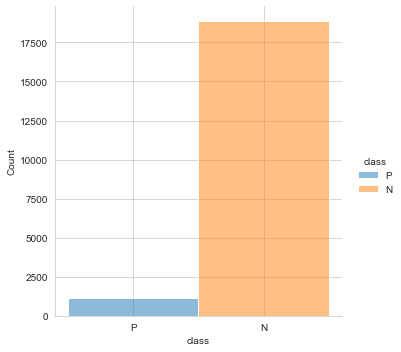

In [15]:
sns.set_style('whitegrid')
sns.displot(data=df_train_copy, x='class', hue='class')

In [16]:
df_train_copy['class'].value_counts()

N    18861
P     1127
Name: class, dtype: int64

Class is highly imbalanced for almost 1:17

#### Some Preprocessing 

In [17]:
df_prep = df_train.copy()

In [21]:
index_ = df_prep.loc[df_prep.isin([-9999.00]).any(axis=1)]

Remove = -9999 = Pb_NO_PCR_V, ECI_NO_UCR_CV, Pa_NO_BSR_SI71

In [24]:
index_['class'].value_counts()

N    66
P     2
Name: class, dtype: int64

In [25]:
df_prep.drop(index_.index, inplace=True)

In [26]:
df_prep.shape

(19920, 29)

In [27]:
df_prep.to_csv('../Data/Cleaned/Training.csv', index=False)